In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D ,Dense ,Flatten
from tensorflow.keras.optimizers import SGD



In [ ]:
os.chdir("/content/drive/My Drive/Deep Learning/mini_project_1")
os.getcwd()

'/content/drive/My Drive/Deep Learning/mini_project_1'

In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
import os

# Function to convert an image to normalized pixel values
def image_to_normalized_pixels(image_path, target_size=(100, 100)):
    try:
        img = Image.open(image_path)
        # Resize the image to a consistent size
        img = img.resize(target_size)
        # Convert the image to a numpy array of pixel values
        pixels = np.array(img)
        # Normalize the pixel values to be in the range [0, 1]
        normalized_pixels = pixels / 255.0
        return normalized_pixels
    except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")
        return None

# Function to create CSV file for a given dataset
def create_csv(dataset_path, csv_filename, label_csv_filename, decimal_places=6):
    # Lists to store normalized pixel values and labels
    pixels_list = []
    labels_list = []

    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)
        label_value = 1 if label == 'ra' else 0  # Encoding 'ra' as 1 and 'da' as 0

        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            normalized_pixels = image_to_normalized_pixels(image_path)

            # Skip images that couldn't be processed
            if normalized_pixels is not None:
                # Flatten the array
                flattened_pixels = normalized_pixels.flatten()
                pixels_list.append(flattened_pixels)
                labels_list.append(label_value)

    # Add normalized pixel values and labels to the DataFrame
    pixels_array = np.array(pixels_list)
    labels_array = np.array(labels_list)

    # Create DataFrames
    pixels_df = pd.DataFrame(pixels_array)
    labels_df = pd.DataFrame(labels_array, columns=['Label'])

    # Save DataFrames to CSV files
    pixels_df.to_csv(csv_filename, index=False, header=False, sep=',', float_format=f'%.{decimal_places}f')
    labels_df.to_csv(label_csv_filename, index=False, sep=',')

# Example usage:
local_dataset_path = '/content/drive/My Drive/Deep Learning/mini_project_1/'
create_csv(os.path.join(local_dataset_path, 'train'), 'input.csv', 'labels.csv', decimal_places=6)
create_csv(os.path.join(local_dataset_path, 'test'), 'input_test.csv', 'labels_test.csv', decimal_places=6)


In [ ]:
import pandas as pd
import os
import numpy as np

# Function to create CSV file for labels
def create_label_csv(dataset_path, label_csv_filename):
    labels_data = {'Label': []}

    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)
        label_value = 1 if label == 'ra' else 0

        for _ in os.listdir(label_path):
            labels_data['Label'].append(label_value)

    df_labels = pd.DataFrame(labels_data)
    df_labels.to_csv(label_csv_filename, index=False, header=False, sep=',')

# Example usage:
local_dataset_path = '/content/drive/My Drive/Deep Learning/mini_project_1/'
create_label_csv(os.path.join(local_dataset_path, 'train'), 'labels.csv')
create_label_csv(os.path.join(local_dataset_path, 'test'), 'labels_test.csv')

# Load data
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv')
X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv')

# Ensure Y_train and Y_test are 1D arrays
Y_train = np.squeeze(Y_train)
Y_test = np.squeeze(Y_test)


In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (80, 30000)
Shape of Y_train:  (80,)
Shape of X_test:  (20, 30000)
Shape of Y_test:  (20,)


In [ ]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (80, 100, 100, 3)
Shape of Y_train:  (80, 1)
Shape of X_test:  (20, 100, 100, 3)
Shape of Y_test:  (20, 1)


In [ ]:
X_train[1,:]

array([[[0.321569, 0.270588, 0.247059],
        [0.321569, 0.270588, 0.247059],
        [0.32549 , 0.27451 , 0.25098 ],
        ...,
        [0.588235, 0.596078, 0.584314],
        [0.592157, 0.6     , 0.588235],
        [0.592157, 0.6     , 0.596078]],

       [[0.321569, 0.270588, 0.247059],
        [0.321569, 0.270588, 0.247059],
        [0.321569, 0.270588, 0.247059],
        ...,
        [0.588235, 0.596078, 0.588235],
        [0.592157, 0.6     , 0.588235],
        [0.592157, 0.6     , 0.596078]],

       [[0.317647, 0.266667, 0.243137],
        [0.317647, 0.266667, 0.243137],
        [0.321569, 0.270588, 0.247059],
        ...,
        [0.588235, 0.596078, 0.592157],
        [0.592157, 0.596078, 0.592157],
        [0.596078, 0.603922, 0.6     ]],

       ...,

       [[0.309804, 0.137255, 0.078431],
        [0.278431, 0.117647, 0.078431],
        [0.223529, 0.090196, 0.082353],
        ...,
        [0.380392, 0.184314, 0.098039],
        [0.388235, 0.192157, 0.098039],
        [

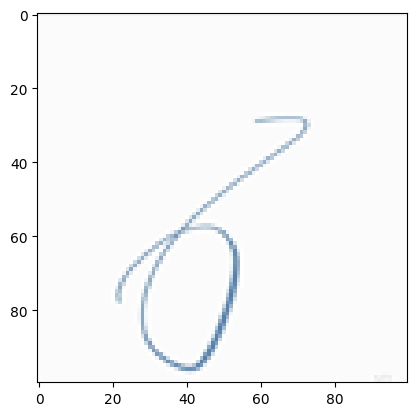

In [ ]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
2/2 [==============================] - 2s 143ms/step - loss: 0.7163 - accuracy: 0.5000
Epoch 2/5
2/2 [==============================] - 1s 166ms/step - loss: 0.8010 - accuracy: 0.5000
Epoch 3/5
2/2 [==============================] - 1s 133ms/step - loss: 0.7280 - accuracy: 0.5000
Epoch 4/5
2/2 [==============================] - 1s 148ms/step - loss: 0.6759 - accuracy: 0.5625
Epoch 5/5
2/2 [==============================] - 1s 217ms/step - loss: 0.6491 - accuracy: 0.6875


In [ ]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 310ms/step - loss: 0.5861 - accuracy: 0.5000


[0.5860670804977417, 0.5]

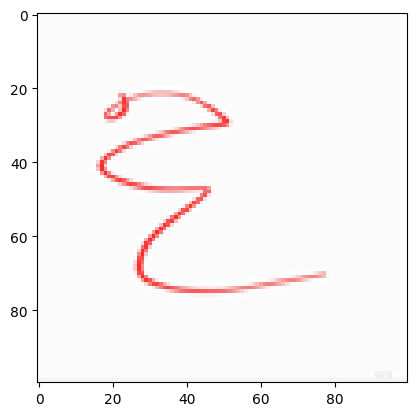

1/1 [==============================] - 0s 32ms/step
[[False]]
Our model says it is a : da


In [ ]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()
y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5
print(y_pred)
if(y_pred == 0):
   pred = 'da'
else:
    pred = 'ra'
print("Our model says it is a :", pred)